In [1]:
#1. Usando la base de datos de Iris 
library(e1071)
library(ggplot2)
data(iris)

**Para crear un conjunto de entrenamiento y uno de prueba se crea primero un índice
que
irá desde 1 hasta el número de filas del dataset Iris. Posteriormente se crean
los conjuntos en donde, el conjunto de entrenamiento tendrá un tamaño aproximado
del 66.66%
y el conjunto de prueba tendrá un tamaño de 33.33%.**

In [2]:
#identificar de que tamaño debe ser el conjunto de entrenamiento
set.seed(20)
index <-c(1:nrow(iris))
test.index <-sample(index, size = (length(index)/3))
train <-iris[-test.index,]
test <-iris[test.index,]

**Creación del modelo**
Para crear el modelo se
utiliza la función svm() y se debe de elegir un kernel


Call:
svm(formula = Species ~ ., data = train, kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  21


            Actual
Prediccion   setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         30         1
  virginica       0          1        35

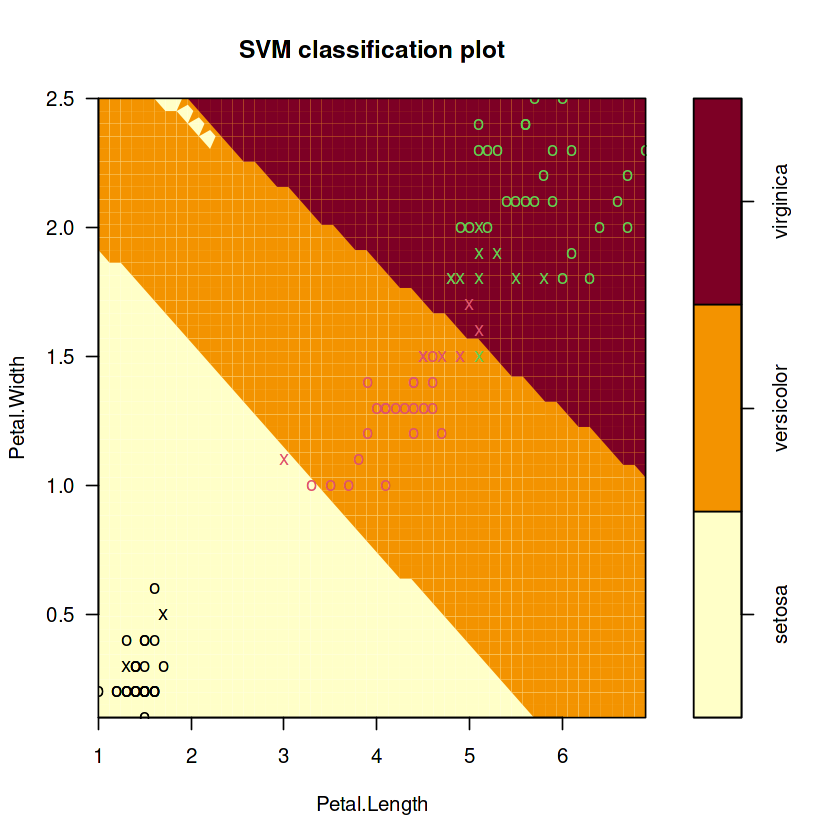

In [3]:
modeloLinear <-svm(Species ~ ., data = train, kernel = 'linear')
modeloLinear
table(Prediccion = predict(modeloLinear, train), Actual =train$Species)
plot(modeloLinear, train, Petal.Width ~ Petal.Length,slice = list(Sepal.Width = 3, Sepal.Length=4))


Call:
svm(formula = Species ~ ., data = train, kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  3 
     coef.0:  0 

Number of Support Vectors:  40


            Actual
Prediccion   setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         31         8
  virginica       0          0        28

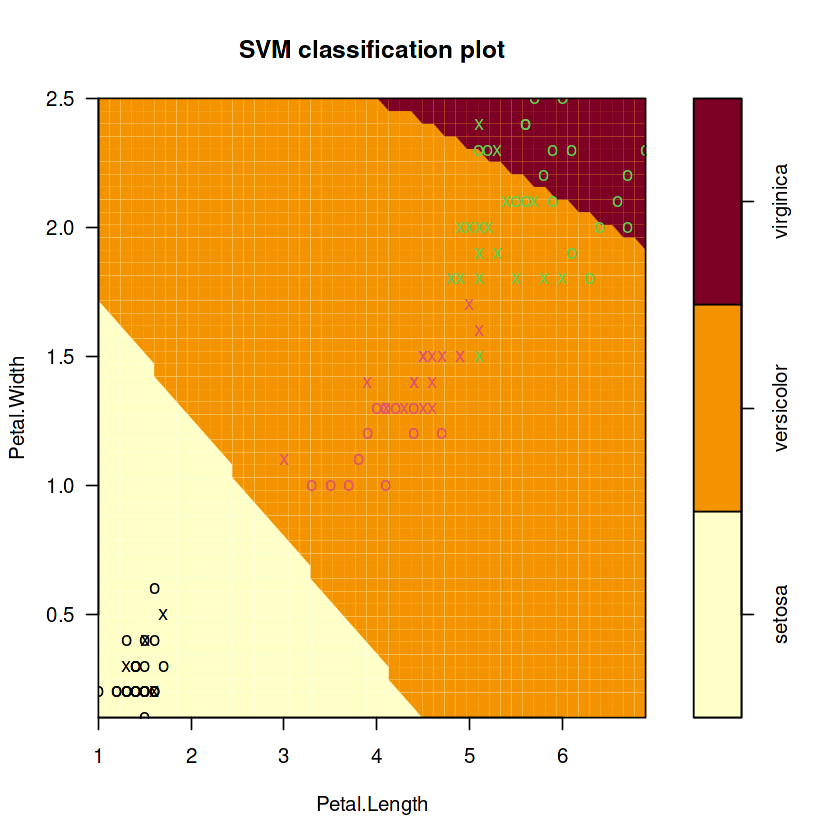

In [4]:
modeloPoly <-svm(Species ~ ., data = train, kernel ='polynomial')
modeloPoly
table(Prediccion = predict(modeloPoly, train), Actual =train$Species)
plot(modeloPoly, train, Petal.Width ~ Petal.Length,slice = list(Sepal.Width = 3, Sepal.Length=4))


Call:
svm(formula = Species ~ ., data = train, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  41


            Actual
Prediccion   setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         29         1
  virginica       0          2        35

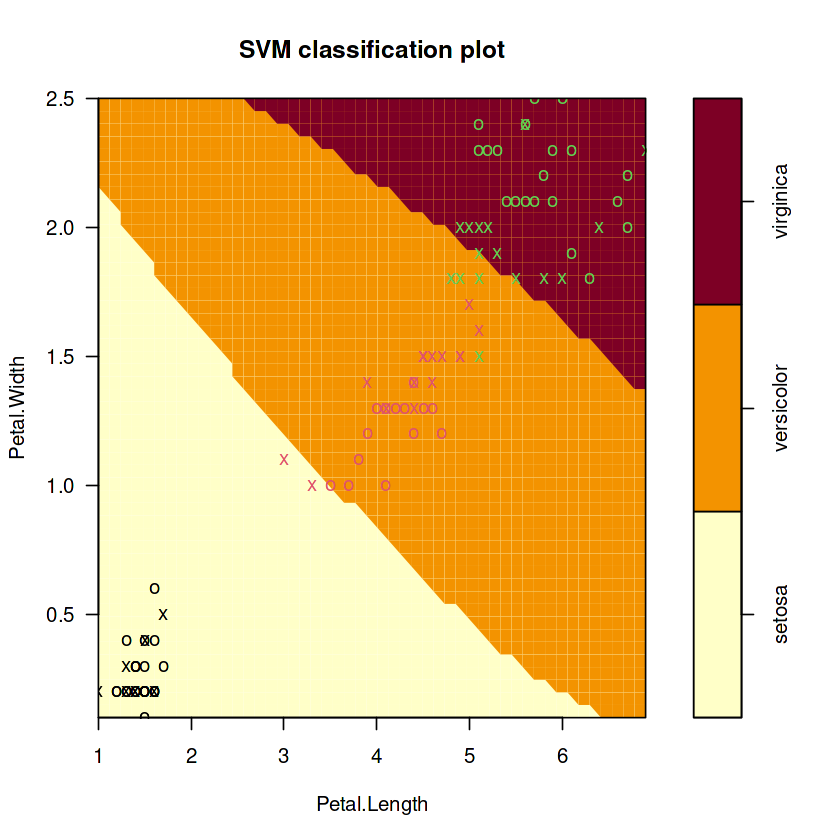

In [5]:
modeloRadial <-svm(Species ~ ., data = train, kernel = 'radial')
modeloRadial
table(Prediccion = predict(modeloRadial, train), Actual =train$Species)
plot(modeloRadial, train, Petal.Width ~ Petal.Length,slice = list(Sepal.Width = 3, Sepal.Length=4))


Call:
svm(formula = Species ~ ., data = train, kernel = "sigmoid")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  sigmoid 
       cost:  1 
     coef.0:  0 

Number of Support Vectors:  43


            Actual
Prediccion   setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         25         0
  virginica       0          6        36

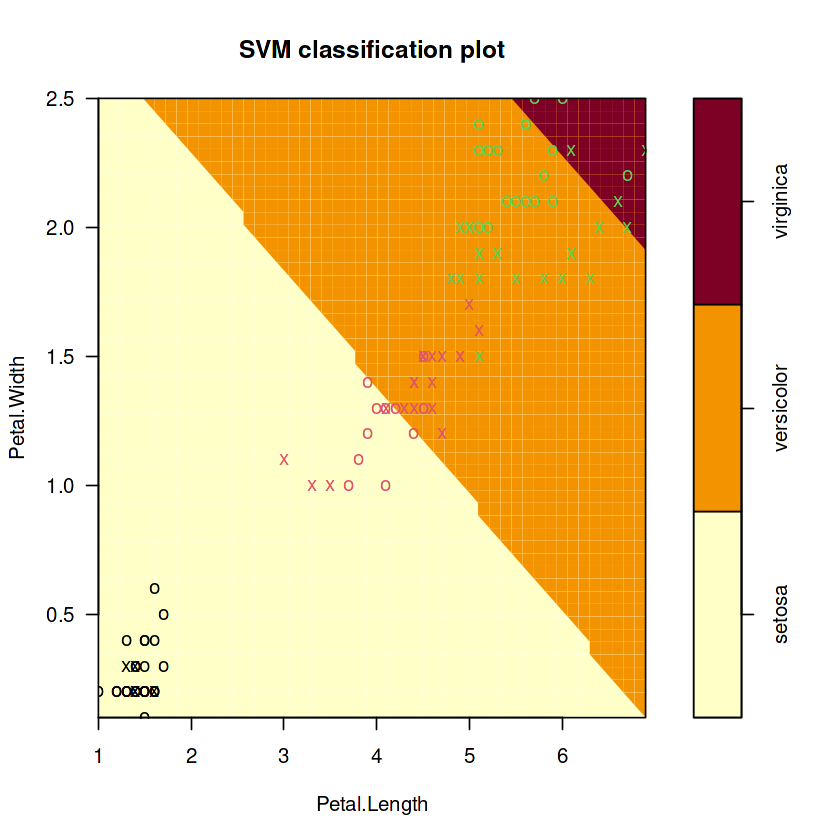

In [6]:
modeloSigmoid <-
svm(Species ~ ., data =train, kernel ='sigmoid')
modeloSigmoid
table(Prediccion = predict(modeloSigmoid, train), Actual =train$Species)
plot(modeloSigmoid, train, Petal.Width ~ Petal.Length,slice = list(Sepal.Width = 3, Sepal.Length=4))

**Buscar el mejor costo**
Para buscar un buen
costo para el modelo se puede utilizar
la función tune(), la cual
se le ingresará las características del modelo.

In [7]:
tuned <-tune(svm,Species~.,data = train,kernel = "linear",ranges = list(cost = seq(0.1, 10, by = 0.2)))
summary(tuned)


Parameter tuning of ‘svm’:

- sampling method: 10-fold cross validation 

- best parameters:
 cost
  1.5

- best performance: 0.02 

- Detailed performance results:
   cost error dispersion
1   0.1  0.05 0.07071068
2   0.3  0.04 0.06992059
3   0.5  0.04 0.06992059
4   0.7  0.04 0.06992059
5   0.9  0.03 0.04830459
6   1.1  0.03 0.04830459
7   1.3  0.03 0.04830459
8   1.5  0.02 0.04216370
9   1.7  0.02 0.04216370
10  1.9  0.02 0.04216370
11  2.1  0.02 0.04216370
12  2.3  0.02 0.04216370
13  2.5  0.02 0.04216370
14  2.7  0.02 0.04216370
15  2.9  0.02 0.04216370
16  3.1  0.02 0.04216370
17  3.3  0.02 0.04216370
18  3.5  0.02 0.04216370
19  3.7  0.02 0.04216370
20  3.9  0.02 0.04216370
21  4.1  0.03 0.04830459
22  4.3  0.03 0.04830459
23  4.5  0.03 0.04830459
24  4.7  0.04 0.06992059
25  4.9  0.04 0.06992059
26  5.1  0.04 0.06992059
27  5.3  0.05 0.08498366
28  5.5  0.05 0.08498366
29  5.7  0.05 0.08498366
30  5.9  0.05 0.08498366
31  6.1  0.05 0.08498366
32  6.3  0.05 0.08498366
33  6.5  

Creación del mejor modelo
Finalmente, creamos el mejor modelo con las características encontradas, el mejor
kernel es el linear y el mejor costo es 1.5

In [8]:
modeloLinear <-svm(Species ~ ., data = train, kernel = 'linear',cost = 1.5)
modeloLinear
cat("\n")
table(Prediccion = predict(modeloLinear, train), Actual =train$Species)


Call:
svm(formula = Species ~ ., data = train, kernel = "linear", cost = 1.5)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1.5 

Number of Support Vectors:  18


            Actual
Prediccion   setosa versicolor virginica
  setosa         33          0         0
  versicolor      0         30         1
  virginica       0          1        35

Se dio la conclusión que por lo menos para este conjunto de datos, el método de SVM no tuvo problema para clasificarlos correctamente con el
método de kernel Lineal, el cual también se concluyó que el parámetro de costo tampoco afectaba el resultado, el mejor valor para c es de: 1-5 para poder 
obtener un error del 1%.
Como también se puede mostrar en la gráfica, se determina que los datos están casi perfectamente clasificados